In [1]:
import re

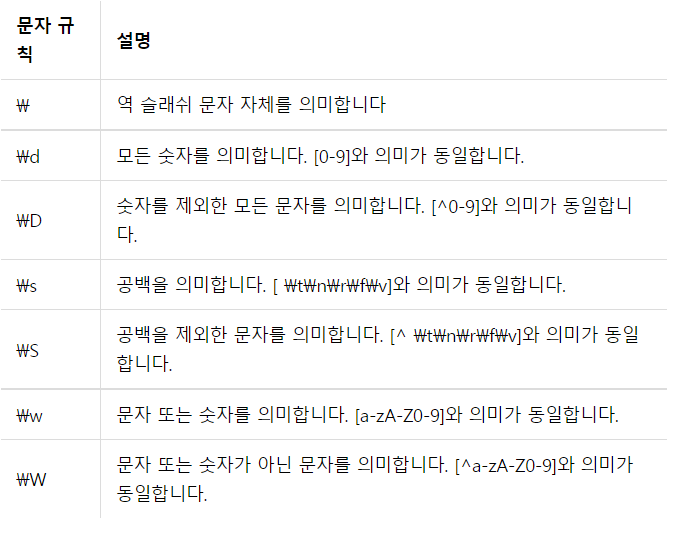

#### 정규 표현식 실습

- . 기호       
한 개의 임의의 문자     
=> akc, azc, a5c등의 형태는 모두 a.c의 정규 표현식과 매치됨.

In [2]:
r=re.compile("a.c")
r.search('kkk') # a.c의 형태가 아니므로 아무 결과도 출력되지 않음

In [3]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

- ?기호      
? 앞의 문자가 존재할 수도 있고 존재하지 않을 수도 있음.

In [4]:
r=re.compile("ab?c")
print(r.search("abc"))
print(r.search("ac"))

<re.Match object; span=(0, 3), match='abc'>
<re.Match object; span=(0, 2), match='ac'>


- *기호      
바로 앞의 문자가 0개 이상일 경우.     
=> 앞의 문자가 존재하지 않을 수도, 여러개일 수도 있다.

In [5]:
r=re.compile("ab*c")
print(r.search("ac"))
print(r.search("abc"))
print(r.search("abbbbbbc"))

<re.Match object; span=(0, 2), match='ac'>
<re.Match object; span=(0, 3), match='abc'>
<re.Match object; span=(0, 8), match='abbbbbbc'>


- +기호     
*와 유사한데 앞의 문자가 최소 1개 이상이어야 함!

In [7]:
r=re.compile("ab+c")
r.search("ac")  #아무 결과도 출력되지 않음

In [8]:
print(r.search("abc"))
print(r.search("abbbbc"))

<re.Match object; span=(0, 3), match='abc'>
<re.Match object; span=(0, 6), match='abbbbc'>


- ^기호     
^ 뒤로 오는 문자열을 문자열의 시작으로 지정함

In [9]:
r=re.compile("^a")
r.search("bc")  #결과 출력 x

In [10]:
r.search("abcde")

<re.Match object; span=(0, 1), match='a'>

- {숫자} 기호     
앞의 문자를 숫자만큼 반복.

In [11]:
r=re.compile("ab{2}c")
print(r.search("ac")) #결과 출력 x
print(r.search("abc")) #결과 출력 x

None
None


In [12]:
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

- {숫자1, 숫자2} 기호     
앞에 오는 문자를 숫자1 이상 숫자2 이하만큼 반복.

In [13]:
r=re.compile("ab{2,8}c")
print(r.search("abc")) #결과 출력 x
print(r.search("abbc"))
print(r.search("abbbbbc"))

None
<re.Match object; span=(0, 4), match='abbc'>
<re.Match object; span=(0, 7), match='abbbbbc'>


- {숫자,} 기호      
앞에 오는 문자를 숫자 이상만큼 반복. 0을 쓰면 *, 1을 쓰면 +와 동일한 의미가 된다.

In [14]:
r=re.compile("ab{2,}c")
print(r.search("abc")) #결과 출력 x
print(r.search("abbc"))
print(r.search("abbbbbc"))

None
<re.Match object; span=(0, 4), match='abbc'>
<re.Match object; span=(0, 7), match='abbbbbc'>


- [] 기호      
[] 안의 문자들 중 한 개의 문자와 매치. [abc]면 a 또는 b 또는 c, a-z면 모든 소문자, a-zA-Z면 알파벳 전부를 의미함!

In [15]:
r=re.compile("[abc]")
print(r.search("zzz")) # 결과 출력 x
print(r.search("a")) 
print(r.search("aaaaaaaa")) 
print(r.search("bacek")) 

None
<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(0, 1), match='b'>


In [16]:
r=re.compile("[a-z]")
r.search("AAA") #결과 출력 x

- [^문자] 기호     
^ 기호 뒤에 붙은 문자들을 제외한 모든 문자를 매치. __위에서 그냥 ^만 쓰는거랑 다르다!__

In [17]:
r=re.compile("[^abc]")
print(r.search("a")) #결과 출력 x
print(r.search("bc")) #결과 출력 x
print(r.search("d"))
print(r.search("5"))

None
None
<re.Match object; span=(0, 1), match='d'>
<re.Match object; span=(0, 1), match='5'>


#### 정규 표현식 모듈(re) 함수 예제

- re.match()와 re.search()      
re.match는 문자열 첫부분부터 정규 표현식과 매치되는지 확인하고, re.search는 정규 표현식 전체에 대해 문자열이 매치하는지를 확인한다.

In [18]:
r=re.compile("ab.")
print(r.search("kkkabc"))
print(r.match("kkkabc")) # 결과 출력 x
print(r.match("abckkk"))

<re.Match object; span=(3, 6), match='abc'>
None
<re.Match object; span=(0, 3), match='abc'>


- re.split()     
입력된 정규 표현식 기준으로 문자열을 분리하여 리스트로 리턴

In [20]:
text="사과 딸기 수박 메론 바나나"
re.split(" ", text)

['사과', '딸기', '수박', '메론', '바나나']

In [21]:
text="""사과
딸기
수박
메론
바나나"""
re.split("\n", text)

['사과', '딸기', '수박', '메론', '바나나']

- re.findall()     
정규 표현식과 매칭되는 모든 문자열을 리스트로 리턴

In [22]:
text="""이름 : 김철수
전화번호 : 010 - 1234 - 1234
나이 : 30
성별 : 남""" 
re.findall("\d+", text)

['010', '1234', '1234', '30']

- re.sub()     
정규 표현식 패턴과 일치하는 문자열을 찾아 다른 문자열로 대체

In [23]:
text="Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern."
re.sub("[^a-zA-Z]", ' ', text)

'Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern '

#### 정규 표현식 텍스트 전처리 예제

In [24]:
text = """100 John    PROF
101 James   STUD
102 Mac   STUD""" 
re.split("\s+", text)

['100', 'John', 'PROF', '101', 'James', 'STUD', '102', 'Mac', 'STUD']

In [25]:
re.findall("\d+", text)

['100', '101', '102']

In [26]:
re.findall("[A-Z]", text)

['J', 'P', 'R', 'O', 'F', 'J', 'S', 'T', 'U', 'D', 'M', 'S', 'T', 'U', 'D']

In [28]:
#대문자가 연속으로 4번 등장하는 경우의 조건 추가
re.findall("[A-Z]{4}", text)

['PROF', 'STUD', 'STUD']

In [29]:
#대문자가 한번 나오고, 한글자 이상의 소문자를 가지는 조건
re.findall("[A-Z][a-z]+", text)

['John', 'James', 'Mac']

#### 정규 표현식을 이용한 토큰화       
nltk에서는 정규표현식을 사용해서 단어 토큰화를 수행하는 RegexpTokenizer를 지원함.    
괄호 안에 원하는 정규 표현식을 넣어서 토큰화를 수행한다

In [30]:
import nltk
from nltk.tokenize import RegexpTokenizer

tokenizer=RegexpTokenizer("[\w]+")
print(tokenizer.tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop"))

['Don', 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'Mr', 'Jone', 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


gaps=True를 이용하여 괄호 안에 토큰을 나누기 위한 기준을 입력할 수도 있음.      
예) 공백을 기준으로 문장 토큰화

In [31]:
tokenizer=RegexpTokenizer("[\s+]", gaps=True)
print(tokenizer.tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop"))

["Don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name,', 'Mr.', "Jone's", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']
